# AAI614: Data Science & its Applications

*Notebook 3.2: Practice with Data Cleaning*

<a href="https://colab.research.google.com/github/harmanani/AAI614/blob/main/Week%203/Notebook3.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

Exercise I. Load the following datafile from GitHub

In [2]:
grads = pd.read_csv("https://raw.githubusercontent.com/harmanani/AAI614/main/Week%203/grads.csv")

In [3]:
grads

,Student Name,Avg Hours Studies per Week,GPA,University,Sense of Humour (0-5),Salary
0,George,20,NaN,NYU,3.0,$40k
1,Jerry,35,3.5,Columbia,5.0,$80k
2,Elaine,55,4.0,Columbia,4.2,$60k
3,Cosmo,5,2.0,City College,2.0,$25k
4,Newman,25,2.8,City College,0.0,$50k
5,Frank,35,3.0,Festivus Uni,NaN,$40k
6,Estelle,100,3.2,Festivus Uni,1.7,$0k
7,Leo,15,2.4,Festivus Uni,0.0,$35k
8,Rachel,50,4.0,Columbia,NaN,$75k


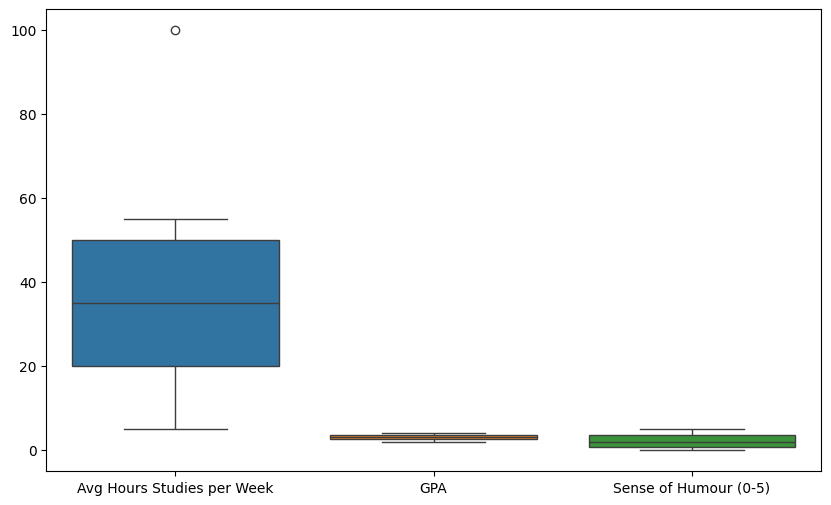

In [5]:
# plot boxplot§
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=grads)
plt.show()

Question 1: Identify all the outliers in the above data.  Justify your answers using objective measures.

The outlier based on the boxplot is the row with 100 Average Hours of Studies per Week

In [6]:
# fill missing values with the mean of the column for column GPA
grads['GPA'] = grads['GPA'].fillna(grads['GPA'].mean())
grads['Sense of Humour (0-5)'] = grads['Sense of Humour (0-5)'].fillna(grads['Sense of Humour (0-5)'].mean())
grads['University'] = grads['University'].fillna(grads['University'].mode()[0])
print(grads)

  Student Name  Avg Hours Studies per Week     GPA     University  \
0       George                          20  3.1125            NYU   
1        Jerry                          35  3.5000       Columbia   
2       Elaine                          55  4.0000       Columbia   
3        Cosmo                           5  2.0000   City College   
4       Newman                          25  2.8000   City College   
5        Frank                          35  3.0000   Festivus Uni   
6      Estelle                         100  3.2000  Festivus Uni    
7          Leo                          15  2.4000   Festivus Uni   
8       Rachel                          50  4.0000       Columbia   

   Sense of Humour (0-5) Salary  
0               3.000000   $40k  
1               5.000000   $80k  
2               4.200000   $60k  
3               2.000000   $25k  
4               0.000000   $50k  
5               2.271429   $40k  
6               1.700000    $0k  
7               0.000000   $35k  
8  

Question 2: There are various data that are missing.  Fill-in the missing data or delete the rows/columns that you think you should delete.  Justify your answer

Question 3: Reload the data and fill-in the data using mean method as well as the frequent method.

Exercise II. Run the cell below to create a new dataframe called `df_miss`.  Its first column will contain some missing values.

In [7]:
import pandas as pd
import numpy as np
import random

nrows = 10
ncols = 5

# set a seed for random number generation
np.random.seed(314)
# create an array filled with random data
data = np.array(np.random.rand(nrows, ncols))
# put the data to a pandas dataframe
df_miss = pd.DataFrame(data)
# rename the columns
df_miss.columns = ['col_'+str(ii) for ii in range(ncols)]

# randomly set some values to missing
ix0 = np.random.randint(nrows, size=3)
ix1 = np.random.randint(nrows, size=3)

df_miss['col_0'][ix0] = np.nan
df_miss['col_1'][ix1] = np.nan

print(df_miss)

      col_0     col_1     col_2     col_3     col_4
0       NaN       NaN  0.265048  0.783205  0.918001
1  0.827355       NaN  0.260480  0.911763  0.260757
2  0.766376  0.261531  0.122291  0.386006  0.840081
3       NaN       NaN  0.633110  0.584766  0.581232
4  0.677205  0.687155  0.438927  0.320927  0.570552
5       NaN  0.861074  0.834805  0.105766  0.060408
6  0.596882  0.792395  0.226356  0.535201  0.136066
7  0.372244  0.151977  0.429822  0.792706  0.406957
8  0.177850  0.909252  0.545331  0.100497  0.718721
9  0.978429  0.309776  0.260126  0.662900  0.139720


/tmp/ipykernel_1140/310065607.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_miss['col_0'][ix0] = np.nan
/tmp/ipykernel_1140/310065607.py:22: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are settin

Impute the missing values (NaN) in `col_0` (but not `col_1`) with the median.  Store the values in the dataframe by using the parameter `inplace`.  Print the dataframe.

In [8]:
df_miss['col_0'].fillna(df_miss['col_0'].median(), inplace=True)
print(df_miss)

      col_0     col_1     col_2     col_3     col_4
0  0.677205       NaN  0.265048  0.783205  0.918001
1  0.827355       NaN  0.260480  0.911763  0.260757
2  0.766376  0.261531  0.122291  0.386006  0.840081
3  0.677205       NaN  0.633110  0.584766  0.581232
4  0.677205  0.687155  0.438927  0.320927  0.570552
5  0.677205  0.861074  0.834805  0.105766  0.060408
6  0.596882  0.792395  0.226356  0.535201  0.136066
7  0.372244  0.151977  0.429822  0.792706  0.406957
8  0.177850  0.909252  0.545331  0.100497  0.718721
9  0.978429  0.309776  0.260126  0.662900  0.139720


/tmp/ipykernel_1140/177808035.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_miss['col_0'].fillna(df_miss['col_0'].median(), inplace=True)


Impute the missing values in `col_1` with value 0.  Store the values in the dataframe by using the parameter `inplace`.  Print the dataframe.

In [9]:
df_miss['col_1'].fillna(0, inplace=True)
print(df_miss)

      col_0     col_1     col_2     col_3     col_4
0  0.677205  0.000000  0.265048  0.783205  0.918001
1  0.827355  0.000000  0.260480  0.911763  0.260757
2  0.766376  0.261531  0.122291  0.386006  0.840081
3  0.677205  0.000000  0.633110  0.584766  0.581232
4  0.677205  0.687155  0.438927  0.320927  0.570552
5  0.677205  0.861074  0.834805  0.105766  0.060408
6  0.596882  0.792395  0.226356  0.535201  0.136066
7  0.372244  0.151977  0.429822  0.792706  0.406957
8  0.177850  0.909252  0.545331  0.100497  0.718721
9  0.978429  0.309776  0.260126  0.662900  0.139720


/tmp/ipykernel_1140/2213679435.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_miss['col_1'].fillna(0, inplace=True)
